In [1]:
# dependency
import numpy as np
import pandas as pd
import copy
import math
import sys
import os
from activations import relu, leaky_relu, sigmoid, tanh, softmax, d_sigmoid, d_relu
from initializers import glorot_uniform, random_normal, random_uniform
from regularizers import l1_regularizer, l2_regularizer
from utility import trim_tail, multiply, subtract, get_nparams, one_hot_encoding, get_data
from metrics import MSE, CCE, ACC, PRECISION, RECALL, essential_metrics, wondering_penalty, close_gap_penalty
from pso import PSO
from ga import GA
from nn import Network
from layer import DenseLayer
from scalers import MinMaxScaler, StandardScaler

In [2]:
# reference
metrics_fn_dict = dict()
metrics_fn_dict['accuracy'] = ACC
metrics_fn_dict['categorical_crossentropy'] = CCE
metrics_fn_dict['mean_square_error'] = MSE
metrics_fn_dict['precision'] = PRECISION
metrics_fn_dict['recall'] = RECALL
metrics_fn_dict['essential_metrics'] = essential_metrics

In [3]:
# model
model = Network(5, 0.005)
model.add_layer(DenseLayer(1, 16, True, afn=sigmoid, dafn=d_sigmoid, rfn=None))
model.add_layer(DenseLayer(2, 3, True, afn=softmax, dafn=d_sigmoid, rfn=None))

In [4]:
# optimizer
opt = 'sgd'

In [5]:
model.compile(loss_fn = 'mean_square_error', optimizer = opt, \
    metrics = ['accuracy', 'mean_square_error', 'categorical_crossentropy', 'precision', 'recall', 'f1'])

building layer 1 with 5
96
building layer 2 with 16
51


In [6]:
# data loading
DATA = os.path.join('c:\\Users\\AI-lab\\github_repo\\neural-network\\', 'dataset')
GROUP = 1
COLUMNS = ['f1', 'f2', 'f3', 'f4', 'f5', 'label']
N_CLASS = 3
EPOCHS = 500
train_dir, test_dir = "..//dataset//training_data{}.txt".format(GROUP), "..//dataset//testing_data{}.txt".format(GROUP)
train, test = get_data(DATA, train_dir, COLUMNS), get_data(DATA, test_dir, COLUMNS)
# shuffle
train, test = train.sample(frac=1), test.sample(frac=1)
x_train, y_train = train.drop('label', axis=1), train['label']
x_test, y_test = test.drop('label', axis=1), test['label']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107 entries, 0 to 106
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   f1      107 non-null    float32
 1   f2      107 non-null    float32
 2   f3      107 non-null    float32
 3   f4      107 non-null    float32
 4   f5      107 non-null    float32
 5   label   107 non-null    float32
dtypes: float32(6)
memory usage: 2.6 KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   f1      108 non-null    float32
 1   f2      108 non-null    float32
 2   f3      108 non-null    float32
 3   f4      108 non-null    float32
 4   f5      108 non-null    float32
 5   label   108 non-null    float32
dtypes: float32(6)
memory usage: 2.7 KB
None


In [7]:
# data scaling and encoding
scaler = StandardScaler(['f1', 'f2', 'f3', 'f4', 'f5'])
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)
y_train = one_hot_encoding(y_train, N_CLASS)
y_test = one_hot_encoding(y_test, N_CLASS)


In [8]:
# learning phase
history = model.fit(x_train, y_train, EPOCHS, verbose = 0)

C:\Users\AI-lab\anaconda3\envs\branch_opencv\lib\site-packages\numpy\core\fromnumeric.py:87: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


In [9]:
import matplotlib.pyplot as plt

def draw_plot(x, y_list, x_label=None, y_label=None, legend=None, title=None):
    fig, ax = plt.subplots(figsize=(12,5))
    for xi, yi in zip(x, y_list):
        ax.plot(xi, yi)
    if x_label is not None and y_label is not None:
        ax.set(xlabel=x_label, ylabel=y_label, title='{} VS {}'.format(x_label, y_label))
    if legend is not None:
        ax.legend(legend)
    ax.grid()
    plt.show()

In [10]:
train_acc = [h['accuracy'] for h in history]
train_mse = [h['mean_square_error'] for h in history]
train_cce = [h['categorical_crossentropy'] for h in history]

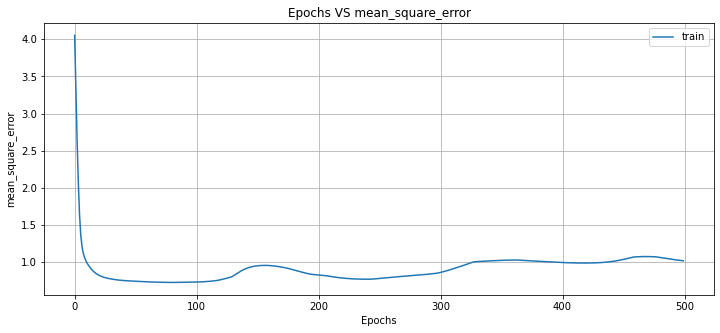

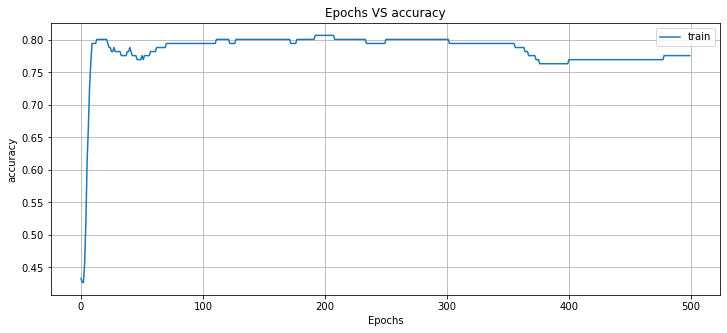

In [11]:
draw_plot(x = [[i for i in range(len(history))]], y_list = [train_cce], x_label = 'Epochs', \
    y_label = model.loss_fn, legend=['train'])
draw_plot(x = [[i for i in range(len(history))]], y_list = [train_acc], x_label = 'Epochs', \
    y_label = 'accuracy', legend=['train'])

In [12]:
# recall phase
score = model.evaluate(x_test, y_test, False)
print(score)

[1. 0. 0.] <-> [[0.9183522 ]
 [0.07741587]
 [0.004232  ]]
[1. 0. 0.] <-> [[0.88860464]
 [0.10805678]
 [0.00333861]]
[0. 0. 1.] <-> [[0.90852857]
 [0.08750822]
 [0.00396326]]
[1. 0. 0.] <-> [[0.92524296]
 [0.07036119]
 [0.00439582]]
[1. 0. 0.] <-> [[0.94537914]
 [0.04967823]
 [0.00494264]]
[1. 0. 0.] <-> [[0.909333  ]
 [0.08668034]
 [0.00398668]]
[1. 0. 0.] <-> [[0.8857745 ]
 [0.09826084]
 [0.0159646 ]]
[1. 0. 0.] <-> [[0.9390273 ]
 [0.05627352]
 [0.00469917]]
[1. 0. 0.] <-> [[0.94810784]
 [0.04666962]
 [0.00522261]]
[0. 1. 0.] <-> [[0.13056046]
 [0.6905686 ]
 [0.1788709 ]]
[1. 0. 0.] <-> [[0.02624117]
 [0.27146152]
 [0.7022973 ]]
[1. 0. 0.] <-> [[0.93692815]
 [0.05450583]
 [0.00856595]]
[1. 0. 0.] <-> [[0.89874536]
 [0.09759101]
 [0.00366366]]
[1. 0. 0.] <-> [[0.6748727 ]
 [0.28639966]
 [0.0387276 ]]
[0. 1. 0.] <-> [[0.8815605 ]
 [0.11532452]
 [0.003115  ]]
[1. 0. 0.] <-> [[0.9354978 ]
 [0.05568908]
 [0.00881308]]
[1. 0. 0.] <-> [[0.90411055]
 [0.0920586 ]
 [0.00383093]]
[0. 0. 1.] <->

In [13]:
print(model)

Layer 1
Neuron 0: weights:
[[ 2.8517118]
 [-2.7708   ]
 [-2.7900095]
 [ 2.9439323]
 [ 2.9322984]]
 bias: [-1.43990664]

Neuron 1: weights:
[[-2.5503006]
 [ 2.320971 ]
 [ 2.3785715]
 [-2.7617888]
 [-2.0001888]]
 bias: [2.5187804]

Neuron 2: weights:
[[ 2.9817443]
 [-3.       ]
 [-3.       ]
 [ 3.       ]
 [ 3.       ]]
 bias: [-1.29289958]

Neuron 3: weights:
[[ 3.        ]
 [-3.        ]
 [-3.        ]
 [ 0.45064062]
 [ 3.        ]]
 bias: [-0.4469045]

Neuron 4: weights:
[[ 3.        ]
 [-3.        ]
 [-3.        ]
 [ 0.31381077]
 [ 3.        ]]
 bias: [-2.82707961]

Neuron 5: weights:
[[-3.]
 [ 3.]
 [ 3.]
 [-3.]
 [-3.]]
 bias: [2.95078459]

Neuron 6: weights:
[[ 0.5450011]
 [-3.       ]
 [-3.       ]
 [ 3.       ]
 [ 3.       ]]
 bias: [0.15830452]

Neuron 7: weights:
[[-3.       ]
 [ 3.       ]
 [ 3.       ]
 [-2.8162103]
 [-3.       ]]
 bias: [2.04554062]

Neuron 8: weights:
[[-1.4335259 ]
 [ 0.30036822]
 [-1.5666416 ]
 [-1.7138288 ]
 [ 1.5771978 ]]
 bias: [-0.94294833]

Neuron 9: 